<a href="https://colab.research.google.com/github/Dev514/Covid_detection/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Covid_Detection using VGG19 architecture**


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
from numpy import asarray
import argparse
import random
import tensorflow as tf
import pickle
import imutils
import cv2
import csv
import os
import gc
import keras
from keras import Model

In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255,rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Train',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

validation_generator=test_datagen.flow_from_directory('/content/gdrive/MyDrive/Test',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 4148 images belonging to 3 classes.
Found 1209 images belonging to 3 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=3,activation="softmax"))


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
VGG=keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable=False
VGG.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
x=Flatten()(VGG.output)
x=Dense(units=256,activation='relu')(x)
prediction=Dense(units=3,activation='softmax')(x)
model=Model(inputs=VGG.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.load_weights('/content/gdrive/MyDrive/VGG19_cp/check_point_VGG19.hdf5')

In [ ]:
filename = "/content/gdrive/MyDrive/VGG19_cp/logs_VGG19.csv"

In [ ]:
# Call the function only once i.e at starting to make log file header 
def create_log_file():
  fields = ['loss', 'val_loss', 'acc', 'val_acc']
# name of csv file 
  with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields)
    csvfile.close()


In [ ]:
from keras.callbacks import *
filepath = "/content/gdrive/MyDrive/VGG19_cp/check_point_VGG19.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_weights_only=True)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        row=[logs.get('loss'),logs.get('val_loss'),logs.get('accuracy'),logs.get('val_accuracy')]
        with open(filename, 'a') as csvfile: 
          # creating a csv writer object 
          csvwriter = csv.writer(csvfile) 
          csvwriter.writerow(row)
          csvfile.close()
        

In [ ]:

H = model.fit(train_generator,
                             validation_data = validation_generator,
                             steps_per_epoch = len(train_generator),
                             initial_epoch=2,
                             epochs = 100,
                             validation_steps = len(validation_generator),
                             callbacks=[checkpoint,myCallback()])

Epoch 3/100
130/130 [==============================] - 1064s 8s/step - loss: 0.7652 - accuracy: 0.7533 - val_loss: 0.4584 - val_accuracy: 0.8313

Epoch 00003: saving model to /content/gdrive/MyDrive/VGG19_cp/check_point_VGG19.hdf5
Epoch 4/100
130/130 [==============================] - 63s 482ms/step - loss: 0.3955 - accuracy: 0.8366 - val_loss: 0.3521 - val_accuracy: 0.8610

Epoch 00004: saving model to /content/gdrive/MyDrive/VGG19_cp/check_point_VGG19.hdf5
Epoch 5/100
130/130 [==============================] - 62s 480ms/step - loss: 0.3800 - accuracy: 0.8464 - val_loss: 0.2975 - val_accuracy: 0.8792

Epoch 00005: saving model to /content/gdrive/MyDrive/VGG19_cp/check_point_VGG19.hdf5
Epoch 6/100
130/130 [==============================] - 62s 477ms/step - loss: 0.3520 - accuracy: 0.8486 - val_loss: 0.6136 - val_accuracy: 0.7651

Epoch 00006: saving model to /content/gdrive/MyDrive/VGG19_cp/check_point_VGG19.hdf5
Epoch 7/100
130/130 [==============================] - 62s 479ms/step - l

In [ ]:
import pandas as pd
df=pd.read_csv("/content/gdrive/MyDrive/VGG19_cp/logs_VGG19.csv")
df.head(10)

,loss,val_loss,acc,val_acc
0,1.283040,0.397549,0.687319,0.838710
1,0.514704,0.409023,0.797975,0.828784
2,0.545292,0.458370,0.791948,0.831266
3,0.387422,0.352138,0.840164,0.861042
4,0.368736,0.297523,0.852700,0.879239
5,0.362326,0.613646,0.845950,0.765095
6,0.358404,0.338268,0.853423,0.873449
7,0.341682,0.300430,0.858727,0.875931
8,0.320620,0.341333,0.873674,0.866005
9,0.301378,0.507173,0.878496,0.799835


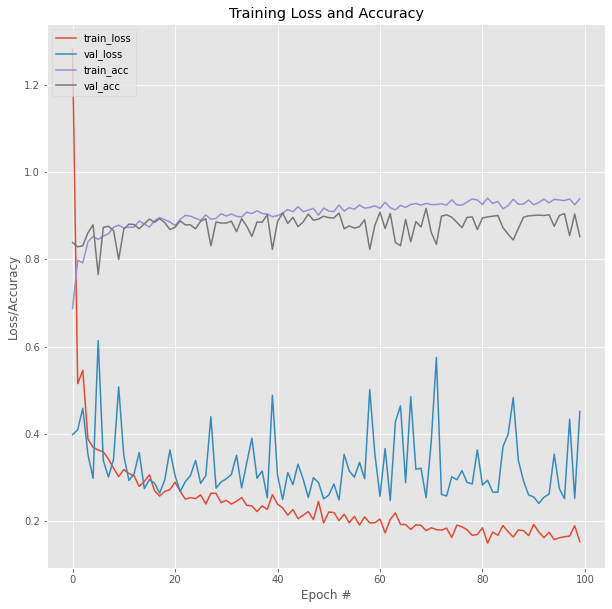

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(10,10))
N = 100
plt.plot(np.arange(0, N), df["loss"], label="train_loss")
plt.plot(np.arange(0, N), df["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), df["acc"], label="train_acc")
plt.plot(np.arange(0, N), df["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")


In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/gdrive/MyDrive/VGG19_cp/model_VGG19.hdf5')

In [ ]:
# load the image
image = cv2.imread('/content/gdrive/MyDrive/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-667.png')
output = image.copy()
print(image.shape)
# pre-process the image for classification
image = cv2.resize(image, (224, 224))
print(image.shape)
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
print(image.shape)

(299, 299, 3)
(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/MyDrive/VGG19_cp/model_VGG19.hdf5')


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

TypeError: ignored

In [ ]:
# classify the input image
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idx = np.argmax(proba)
arr=['Covid','Normal','Pneumonia']
label=arr[idx]

[INFO] classifying image...


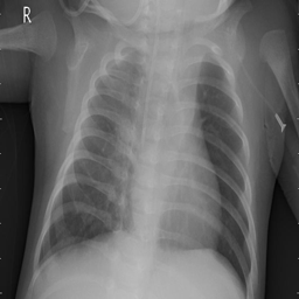

[INFO] Pneumonia: 92.73% 


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(output)
label = "{}: {:.2f}% ".format(label, proba[idx] * 100)
output = imutils.resize(output, width=400)
cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 255, 0), 2)
# show the output image
print("[INFO] {}".format(label))

In [ ]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
y_actual=[]
y_test=[]

In [ ]:
import os
from keras.preprocessing import image

for i in os.listdir("/content/gdrive/MyDrive/Test/COVID/"):
  img=image.load_img("/content/gdrive/MyDrive/Test/COVID/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  idx=np.argmax(model.predict(img)[0])
  y_test.append(idx)
  y_actual.append(0)

In [ ]:
for i in os.listdir("/content/gdrive/MyDrive/Test/Normal/"):
  img=image.load_img("/content/gdrive/MyDrive/Test/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  idx=np.argmax(model.predict(img)[0])
  y_test.append(idx)
  y_actual.append(1)

In [ ]:
for i in os.listdir("/content/gdrive/MyDrive/Test/Viral Pneumonia/"):
  img=image.load_img("/content/gdrive/MyDrive/Test/Viral Pneumonia/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  idx=np.argmax(model.predict(img)[0])
  y_test.append(idx)
  y_actual.append(2)

In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)

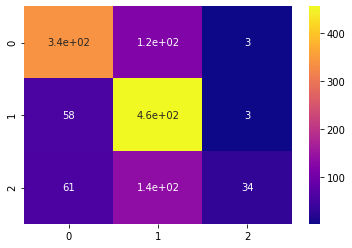

In [ ]:
import seaborn as sns
sns.heatmap(cm,cmap="plasma",annot=True)

(1209,)